In [1]:
import pandas as pd
import string
import unicodedata
import sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import sklearn.model_selection as cv
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
data = pd.read_csv('text_emotion.csv')

In [3]:
smileyfaces = [':-)', ':)', ':D', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)']
sadfaces = ['>:[', ':-(', ':(', ':-c', ':c', ':-<', ':<', ':-[', ':[', ':{', '=(','=[', 'D:']
angryfaces = ['>:(', '(╯°□°)╯︵ ┻━┻']
cryingfaces = [":’-(", ":’("]
skepticalfaces = ['>:', '>:/', ':-/', '=/',':L', '=L', ':S', '>.<']
noexpressionfaces = [':|', ':-|', '(｀・ω・´)']
surprisedfaces = ['>:O', ':-O', ':O', ':-o', ':o', '8O', 'O_O', 'o-o', 'O_o', 'o_O', 'o_o', 'O-O']

In [4]:
def cleanText(wordSeries):
    def remove_punctuation(x):
        for char in string.punctuation:
            x = x.replace(char, ' ')
        return x
    for smile in smileyfaces:
        wordSeries = wordSeries.apply(lambda x: x.replace(smile, ' smileyface '))
    for sad in sadfaces:
        wordSeries = wordSeries.apply(lambda x: x.replace(sad,' sadface '))
    for angry in angryfaces:
        wordSeries = wordSeries.apply(lambda x: x.replace(angry, ' angryface '))
    for cry in cryingfaces:
        wordSeries = wordSeries.apply(lambda x: x.replace(cry, ' cryingface '))
    for skeptical in skepticalfaces:
        wordSeries = wordSeries.apply(lambda x: x.replace(skeptical, ' skepticalface '))
    for noexp in noexpressionfaces:
        wordSeries = wordSeries.apply(lambda x: x.replace(noexp, ' noexpressionfaces '))
    for surprised in surprisedfaces:
        wordSeries = wordSeries.apply(lambda x: x.replace(surprised, ' surprisedface '))
    wordSeries = wordSeries.apply(lambda x: x.replace('...', ' dotdotdot '))
    wordSeries = wordSeries.apply(lambda x: x.replace('!', ' exclamatory '))
    wordSeries = wordSeries.apply(lambda x: remove_punctuation(x))
    wordSeries = wordSeries.apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
    wordSeries = wordSeries.apply(lambda x: x.lower())
    #wordSeries = wordSeries.apply(lambda x: x.replace('http', ' '))
    wordSeries = wordSeries.apply(lambda x: ' '.join( [w for w in x.split() if len(w)>1] ))
    return wordSeries

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
def tokenize(documents):
    documents = cleanText(documents)
    docs = [word_tokenize(content) for content in documents]
    stopwords_=set(stopwords.words('english'))
    def filter_tokens(sent):
        return([w for w in sent if not w in stopwords_])
    docs=list(map(filter_tokens,docs))
    lemmatizer = WordNetLemmatizer()
    docs_lemma = [[lemmatizer.lemmatize(word) for word in words] for words in docs]
    return docs_lemma

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
def tokenizeC(documents):
    documents = cleanText(documents)
    docs = [word_tokenize(content) for content in documents]
    stopwords_=set(stopwords.words('english'))
    def filter_tokens(sent):
        return([w for w in sent if not w in stopwords_])
    docs=list(map(filter_tokens,docs))
    snowball = SnowballStemmer('english')
    docs_snowball = [[snowball.stem(word) for word in words] for words in docs]
    return docs_snowball

In [7]:
def labelmood(mood):
    if mood in ['empty', 'sadness', 'worry', 'hate', 'boredom', 'anger']:
        return -1
    elif mood == 'neutral':
        return 0
    else:
        return 1

In [8]:
data['TokensC'] = tokenizeC(data['content'])

In [7]:
data['Tokens'] = tokenize(data['content'])
data['positive/negative'] = data['sentiment'].apply(lambda x: labelmood(x))

In [8]:
positive = data[data['positive/negative'] == 1]
negative = data[data['positive/negative'] == -1]
neutral = data[data['positive/negative'] == 0]

In [10]:
def countNumOfSent(df, sentiment):
    return df[df['sentiment'] == sentiment].shape[0]

In [11]:
counts = {}
for sent in data['sentiment'].unique():
    counts[sent] = countNumOfSent(data, sent)

In [12]:
counts

{'empty': 827,
 'sadness': 5165,
 'enthusiasm': 759,
 'neutral': 8638,
 'worry': 8459,
 'surprise': 2187,
 'love': 3842,
 'fun': 1776,
 'hate': 1323,
 'happiness': 5209,
 'boredom': 179,
 'relief': 1526,
 'anger': 110}

In [9]:
import operator
def createDict(token):
    words = {}
    for row in token:
        for word in row:
            if word in words:
                words[word] += 1
            else:
                words[word] = 1
    sorted_d = dict( sorted(words.items(), key=operator.itemgetter(1),reverse=True))
    return sorted_d

In [10]:
positivewords = createDict(positive['Tokens'])
negativewords = createDict(negative['Tokens'])
neutralwords = createDict(neutral['Tokens'])
words = createDict(data['Tokens'])

In [11]:
keys = [k for k in words]
vals = [v for v in words.values()]
keys_p = [k for k in positivewords]
vals_p = [v for v in positivewords.values()]
keys_n = [k for k in negativewords]
vals_n = [v for v in negativewords.values()]
keys_neutral = [k for k in neutralwords]
vals_neutral = [v for v in neutralwords.values()]

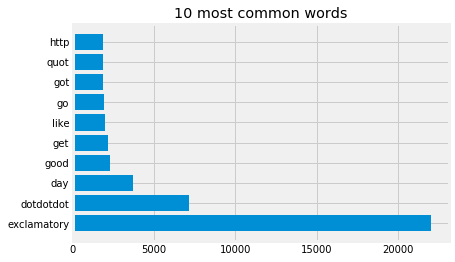

In [12]:
plt.barh(keys[:10], vals[:10], align='center')
plt.title("10 most common words")
plt.show()

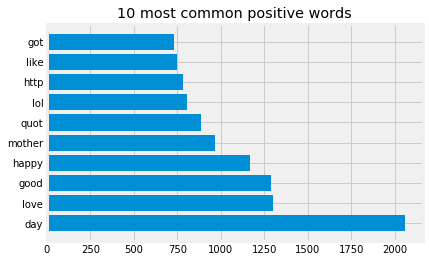

In [13]:
plt.barh(keys_p[2:12], vals_p[2:12], align='center')
plt.title("10 most common positive words")
plt.show()

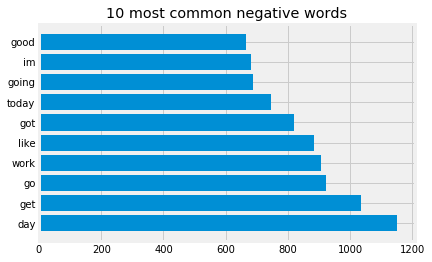

In [14]:
plt.barh(keys_n[2:12], vals_n[2:12], align='center')
plt.title("10 most common negative words")
plt.show()

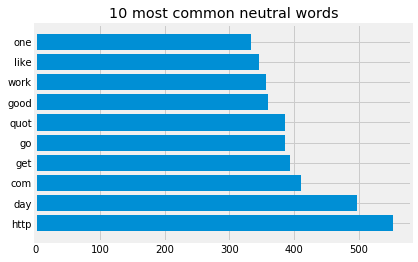

In [15]:
plt.barh(keys_neutral[2:12], vals_neutral[2:12], align='center')
plt.title("10 most common neutral words")
plt.show()

In [9]:
data['tokenJ'] = data['TokensC'].apply(lambda x: ' '.join(x))
corpus = [row for row in data['tokenJ']]

In [ ]:
data['tokenJ'] = data['TokensC'].apply(lambda x: ' '.join(x))
corpus = [row for row in data['tokenJ']]

In [10]:
tf = CountVectorizer()

document_tf_matrix = tf.fit_transform(corpus).todense()

tfidf = TfidfVectorizer()
document_tfidf_matrix = tfidf.fit_transform(corpus)

In [11]:
X = document_tfidf_matrix
y = data['sentiment']

In [12]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25)

In [13]:
lg = LogisticRegression(max_iter = 300)
lg.fit(Xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
lg.score(Xtest, ytest)

0.3487

In [22]:
def getTopN(n, reg, X, y):
    probs = reg.predict_proba(X)
    topN = []
    for prob in probs:
        best_N = list(reversed(np.argsort(prob)))[:n]
        topN.append(best_N)
    topN = np.array(topN)
    mood = np.array(sorted(y.unique()))
    topNpred = mood[topN]
    return topNpred

In [23]:
def getScore(X, y):
    count = 0
    for idx in range(len(y)):
        if np.array(y)[idx] in X[idx]:
            count+=1
    return count/len(y)

In [19]:
model = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.01)

In [20]:
model.fit(Xtrain, ytrain)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [21]:
model.score(Xtest, ytest)

0.3122

In [28]:
top3 = getTopN(3, model, Xtest, ytest)

In [29]:
getScore(top3, ytest)

KeyboardInterrupt: 

In [38]:
from xgboost import XGBClassifier

In [40]:
xg = XGBClassifier(random_state=1,learning_rate=0.01, n_estimators = 300)

In [41]:
xg.fit(Xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [42]:
xg.score(Xtest, ytest)

0.30456666666666665

In [ ]:
top3 = getTopN(3, xg, Xtest, ytest)
getScore(top3, ytest)

In [43]:
clf = DecisionTreeClassifier()
clf.fit(Xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
clf.score(Xtest, ytest)

0.23986666666666667

In [45]:
rf = RandomForestClassifier()
rf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
rf.score(Xtest, ytest)

0.31216666666666665

In [47]:
ridge = RidgeClassifier()
ridge.fit(Xtrain, ytrain)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [48]:
ridge.score(Xtest, ytest)

0.3189

In [59]:
from sklearn.metrics import confusion_matrix
cmtx = confusion_matrix(ytest, lg.predict(Xtest))

In [60]:
cmtx

array([[   0,    0,    0,    0,    0,    1,    0,    0,   15,    0,    1,
           0,    7],
       [   0,    0,    0,    0,    0,    1,    1,    2,   19,    0,   11,
           0,   17],
       [   0,    0,    0,    0,    0,    8,    1,    0,  133,    1,    9,
           0,   66],
       [   0,    0,    0,    0,    0,   28,    0,   11,   87,    0,   11,
           0,   57],
       [   0,    0,    0,    0,    7,  112,    0,   27,  168,    0,   12,
           1,  106],
       [   0,    0,    0,    0,    3,  465,    0,  106,  472,    3,   34,
          10,  200],
       [   0,    0,    1,    0,    0,   16,   39,    2,  102,    0,   51,
           0,  160],
       [   0,    0,    0,    0,    4,  203,    1,  342,  250,    1,   28,
           6,  143],
       [   0,    0,    3,    0,    5,  167,    5,   59, 1364,    3,   99,
           5,  495],
       [   0,    0,    0,    0,    1,   66,    0,   21,  143,    6,   23,
           1,   96],
       [   0,    0,    0,    0,    2,   60,   17, 

In [61]:
pd.crosstab(ytest, lg.predict(Xtest), rownames=['True'], colnames=['Predicted']).apply(lambda r: 100.0 * r/r.sum())

Predicted,empty,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry
True,,,,,,,,,,
anger,0.0,0.000000,0.074738,0.000000,0.000000,0.374906,0.000000,0.120482,0.000000,0.233957
boredom,0.0,0.000000,0.074738,1.234568,0.298954,0.474881,0.000000,1.325301,0.000000,0.568182
empty,0.0,0.000000,0.597907,1.234568,0.000000,3.324169,5.555556,1.084337,0.000000,2.205882
enthusiasm,0.0,0.000000,2.092676,0.000000,1.644245,2.174456,0.000000,1.325301,0.000000,1.905080
fun,0.0,25.925926,8.370703,0.000000,4.035874,4.198950,0.000000,1.445783,2.564103,3.542781
happiness,0.0,11.111111,34.753363,0.000000,15.844544,11.797051,16.666667,4.096386,25.641026,6.684492
hate,20.0,0.000000,1.195815,48.148148,0.298954,2.549363,0.000000,6.144578,0.000000,5.347594
love,0.0,14.814815,15.171898,1.234568,51.121076,6.248438,5.555556,3.373494,15.384615,4.779412
neutral,60.0,18.518519,12.481315,6.172840,8.819133,34.091477,16.666667,11.927711,12.820513,16.544118


In [49]:
pd.crosstab(ytest, model.predict(Xtest), rownames=['True'], colnames=['Predicted']).apply(lambda r: 100.0 * r/r.sum())

Predicted,anger,boredom,empty,enthusiasm,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry
True,,,,,,,,,,,,,
anger,0.000000,0.000000,0.000000,0.0,1.754386,0.187829,0.260417,0.048709,0.261254,0.628931,0.148588,0.000000,0.386520
boredom,0.000000,0.000000,0.000000,0.0,0.000000,0.187829,0.520833,0.194837,0.535906,0.628931,0.445765,0.000000,0.446914
empty,0.000000,16.666667,13.333333,0.0,0.000000,0.638618,1.822917,0.438383,2.813505,2.515723,1.263001,4.411765,1.787656
enthusiasm,0.000000,0.000000,0.000000,4.0,3.508772,1.990984,0.781250,0.584510,1.935959,3.144654,0.817236,0.000000,2.319121
fun,8.333333,0.000000,0.000000,0.0,10.526316,7.588279,0.781250,2.386751,4.441318,2.515723,1.485884,4.411765,4.710714
happiness,8.333333,8.333333,6.666667,24.0,28.070175,34.147258,2.083333,14.710180,9.813773,20.754717,4.086181,13.235294,13.177920
hate,16.666667,0.000000,0.000000,0.0,0.000000,1.126972,42.708333,0.730638,3.061361,0.628931,3.343239,4.411765,3.394130
love,0.000000,8.333333,6.666667,0.0,5.263158,14.425244,2.604167,52.167560,5.439443,11.320755,3.343239,7.352941,6.727866
neutral,8.333333,25.000000,40.000000,40.0,15.789474,13.260706,9.635417,8.426693,29.581994,19.496855,7.355126,16.176471,15.738616


In [50]:
pd.crosstab(ytest, xg.predict(Xtest), rownames=['True'], colnames=['Predicted']).apply(lambda r: 100.0 * r/r.sum())

Predicted,boredom,enthusiasm,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry
True,,,,,,,,,,,
anger,0.000000,0.000000,0.000000,0.221926,0.271739,0.054975,0.273462,0.970874,0.107759,0.0,0.346558
boredom,12.903226,0.000000,0.000000,0.221926,0.543478,0.164926,0.509633,0.000000,0.323276,0.0,0.430210
empty,6.451613,0.000000,0.000000,0.577008,1.630435,0.384827,2.740833,0.970874,0.754310,0.0,1.816444
enthusiasm,3.225806,0.000000,11.111111,1.819796,0.815217,0.549753,1.957738,0.970874,0.646552,0.0,2.270554
fun,3.225806,0.000000,33.333333,7.545495,0.815217,2.144035,4.269733,2.912621,1.724138,5.0,4.995220
happiness,0.000000,45.454545,22.222222,34.664891,0.815217,14.403518,9.857054,19.417476,4.633621,30.0,14.208891
hate,6.451613,9.090909,0.000000,1.198402,44.021739,0.659703,3.057800,0.000000,1.508621,0.0,3.441683
love,0.000000,0.000000,0.000000,14.691522,2.989130,54.315558,5.929149,5.825243,2.909483,5.0,7.038719
neutral,16.129032,27.272727,11.111111,11.229472,8.152174,7.971413,28.806712,13.592233,5.280172,0.0,15.738528


In [51]:
pd.crosstab(ytest, clf.predict(Xtest), rownames=['True'], colnames=['Predicted']).apply(lambda r: 100.0 * r/r.sum())

Predicted,anger,boredom,empty,enthusiasm,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry
True,,,,,,,,,,,,,
anger,0.000000,0.000000,0.455581,0.328947,0.105597,0.211864,0.451807,0.138026,0.254911,0.275482,0.356653,0.307220,0.295989
boredom,0.000000,1.724138,0.284738,0.000000,0.211193,0.306026,0.753012,0.172533,0.329885,0.413223,0.740741,0.691244,0.636377
empty,0.000000,5.172414,4.441913,0.657895,1.795143,1.624294,1.204819,1.242236,2.729045,1.239669,1.563786,1.459293,2.205121
enthusiasm,0.000000,1.724138,1.082005,3.947368,2.323126,2.095104,1.204819,1.518288,2.249213,1.239669,1.700960,1.996928,1.864733
fun,0.000000,1.724138,2.334852,6.907895,7.497360,6.850282,3.012048,3.692202,4.543410,4.958678,2.743484,5.222734,4.173450
happiness,7.692308,1.724138,7.403189,17.105263,17.740232,25.164783,4.518072,17.805383,11.066127,13.085399,8.532236,15.745008,8.583691
hate,3.846154,10.344828,2.505695,1.315789,2.639916,2.048023,23.945783,1.587302,2.564103,1.928375,3.786008,2.995392,3.907059
love,3.846154,3.448276,4.840547,9.868421,8.025343,12.711864,4.969880,32.539683,6.222822,11.707989,5.432099,7.834101,5.875388
neutral,38.461538,15.517241,41.343964,21.381579,20.274551,16.242938,13.403614,13.802622,28.894887,17.630854,15.720165,21.044547,20.260471


In [52]:
pd.crosstab(ytest, rf.predict(Xtest), rownames=['True'], colnames=['Predicted']).apply(lambda r: 100.0 * r/r.sum())

Predicted,anger,boredom,empty,enthusiasm,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry
True,,,,,,,,,,,,,
anger,0.0,0.0,0.000000,0.000000,2.531646,0.129299,0.735294,0.000000,0.330160,0.671141,0.316122,0.000000,0.279955
boredom,0.0,0.0,0.000000,0.000000,0.000000,0.206879,1.102941,0.208681,0.483722,1.342282,0.421496,1.333333,0.559910
empty,0.0,0.0,1.886792,0.000000,1.265823,0.879235,0.367647,0.626043,2.825553,2.684564,2.704601,2.000000,1.749720
enthusiasm,0.0,0.0,0.000000,0.000000,1.265823,2.404965,0.367647,0.876461,2.211302,1.342282,1.053741,2.000000,1.805711
fun,0.0,0.0,0.000000,0.000000,21.518987,7.680372,1.838235,2.963272,4.998464,6.711409,1.721110,1.333333,3.345465
happiness,0.0,0.0,5.660377,17.647059,25.316456,32.686837,1.470588,17.404007,11.117936,14.093960,5.198455,16.666667,7.614782
hate,0.0,100.0,5.660377,0.000000,1.265823,1.344712,43.750000,0.918197,2.879300,0.671141,4.039340,3.333333,4.255319
love,0.0,0.0,0.000000,11.764706,7.594937,13.136799,1.838235,46.202003,5.858415,4.697987,4.460836,9.333333,5.151176
neutral,100.0,0.0,41.509434,29.411765,16.455696,13.628136,9.191176,9.724541,29.115479,24.832215,19.178082,14.666667,17.203247


In [53]:
pd.crosstab(ytest, ridge.predict(Xtest), rownames=['True'], colnames=['Predicted']).apply(lambda r: 100.0 * r/r.sum())

Predicted,empty,enthusiasm,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry
True,,,,,,,,,,,
anger,0.0,0.000000,0.000000,0.165720,0.000000,0.000000,0.334352,0.000000,0.336289,0.626959,0.316270
boredom,0.0,0.000000,0.478469,0.213068,0.653595,0.288660,0.448987,0.520833,0.550290,0.000000,0.585686
empty,0.0,0.000000,0.956938,1.183712,1.960784,0.577320,3.066488,1.562500,1.895445,3.448276,1.874195
enthusiasm,4.0,0.000000,0.956938,2.083333,0.653595,0.907216,2.350019,2.083333,1.498013,1.567398,1.745344
fun,0.0,8.333333,11.961722,7.836174,1.307190,3.216495,4.661827,2.604167,2.537450,6.583072,3.560970
happiness,20.0,12.500000,20.574163,30.871212,1.633987,17.814433,10.794803,19.270833,6.817487,15.047022,7.813049
hate,8.0,4.166667,1.435407,1.136364,38.888889,0.824742,2.703477,1.562500,5.319474,1.567398,3.982664
love,8.0,16.666667,8.133971,13.849432,1.960784,44.206186,5.798624,9.895833,4.738612,5.956113,4.931475
neutral,32.0,12.500000,22.009569,15.269886,14.052288,10.391753,31.887658,18.750000,14.001834,20.689655,18.238257
